In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = yf.download('MSFT', start='2021-01-01')

[*********************100%***********************]  1 of 1 completed


In [3]:
df['SMA'] = df.Close.rolling(window=20).mean()

In [4]:
df['stddev'] = df.Close.rolling(window=20).std()

In [5]:
df['Upper'] = df.SMA + 2* df.stddev
df['Lower'] = df.SMA - 2* df.stddev

In [6]:
df['Buy_Signal'] = np.where(df.Lower > df.Close, True, False)

In [7]:
df['Sell_Signal'] = np.where(df.Upper < df.Close, True, False)

In [8]:
df = df.dropna()

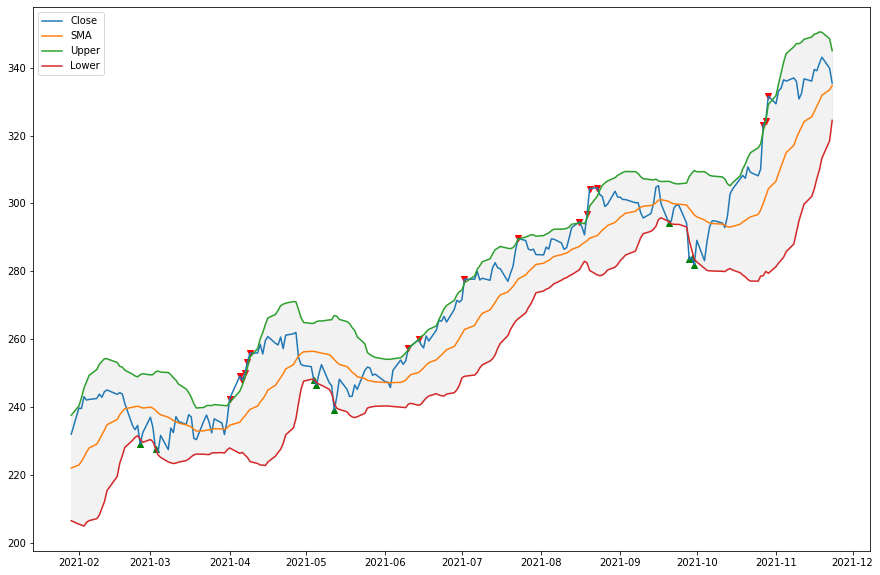

In [9]:
plt.figure(figsize=(15,10))
plt.plot(df[['Close', 'SMA', 'Upper', 'Lower']])
plt.scatter(df.index[df.Buy_Signal], df[df.Buy_Signal].Close, marker= '^', color='g')
plt.scatter(df.index[df.Sell_Signal], df[df.Sell_Signal].Close, marker= 'v', color='r')
plt.fill_between(df.index, df.Upper, df.Lower, color ='grey', alpha=0.1)
plt.legend(['Close', 'SMA', 'Upper', 'Lower'])
plt.show()

In [10]:
buys = []
sells = []
open_pos = False

for i in range(len(df)):
    if df.Lower[i] > df.Close[i]:
        if open_pos == False:
            buys.append(i)
            open_pos = True
    elif df.Upper[i] < df.Close[i]:
        if open_pos:
            sells.append(i)
            open_pos = False

In [11]:
buys

[18, 65, 161]

In [12]:
sells

[43, 91, 188]

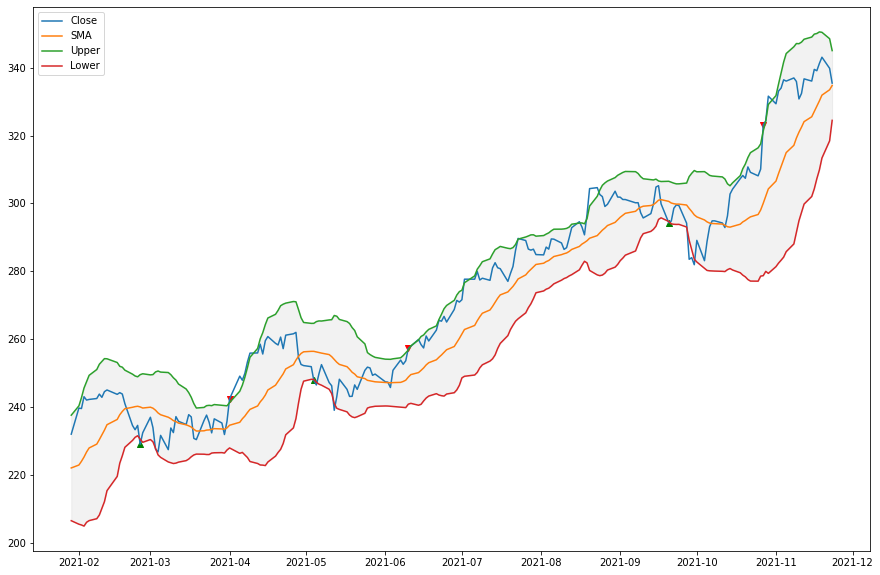

In [13]:
plt.figure(figsize=(15,10))
plt.plot(df[['Close', 'SMA', 'Upper', 'Lower']])
plt.scatter(df.iloc[buys].index, df.iloc[buys].Close, marker= '^', color='g')
plt.scatter(df.iloc[sells].index, df.iloc[sells].Close, marker= 'v', color='r')
plt.fill_between(df.index, df.Upper, df.Lower, color ='grey', alpha=0.1)
plt.legend(['Close', 'SMA', 'Upper', 'Lower'])
plt.show()

In [14]:
merged = pd.concat([df.iloc[buys].Close, df.iloc[sells].Close], axis=1)

In [15]:
merged

,Close,Close
Date,,
2021-02-25,228.990005,NaN
2021-04-01,NaN,242.350006
2021-05-04,247.789993,NaN
2021-06-10,NaN,257.239990
2021-09-20,294.299988,NaN
2021-10-27,NaN,323.170013


In [16]:
merged.columns=['Buys','Sells']

In [17]:
merged

,Buys,Sells
Date,,
2021-02-25,228.990005,NaN
2021-04-01,NaN,242.350006
2021-05-04,247.789993,NaN
2021-06-10,NaN,257.239990
2021-09-20,294.299988,NaN
2021-10-27,NaN,323.170013


In [18]:
totalprofit = merged.shift(-1).Sells - merged.Buys

In [19]:
totalprofit

Date
2021-02-25    13.360001
2021-04-01          NaN
2021-05-04     9.449997
2021-06-10          NaN
2021-09-20    28.870026
2021-10-27          NaN
dtype: float64

In [20]:
relprofits = (merged.shift(-1).Sells - merged.Buys)/merged.Buys

In [21]:
relprofits

Date
2021-02-25    0.058343
2021-04-01         NaN
2021-05-04    0.038137
2021-06-10         NaN
2021-09-20    0.098097
2021-10-27         NaN
dtype: float64

In [22]:
relprofits.mean()

0.06485918408130124